# COMP47490- Assignment 2
<b>By Brian Byrne - 18391933</b>

The dataset being used in this question is <b><i><u>US_census_18391933.csv</u></i></b>. This is an extract of data collected for the the 1994 United States Census Bureau data.

The objective of this question is to use the ensemble learning functionality to identify
the extent to which classification performance can be improved through the
combination of multiple models. Experiments will be run on a dataset extracted from
US Census data. The data contains 14 attributes including age, race, sex, marital
status etc, and the goal is to predict whether the individual earns over $50k per year.

## 1(a) Data Preprocessing
<b><i>Carefully clean and prepare the dataset for machine learning analysis. You can
do basic feature engineering to make your techniques scalable, but there is no
need to go overboard with the dataset cleaning. Carefully consider the
evaluation measure(s) that you use for this exercise and justify why you
selected the particular evaluation measure(s). [Important: As much as possible,
use this evaluation measure for the subsequent parts] [10 marks]</i></b>


Data cleaning and transformation

In [230]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
# to make the plots display inline 
%matplotlib inline 

The data contains 14 attributes including age, race, sex, marital
status etc, and the goal is to predict whether the individual earns over $50k per year.

In [231]:
original_df = pd.read_csv('US_census_18391933.csv')
original_df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,27,Private,189530,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,35,United-States,<=50K
1,55,Private,35551,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,46,Private,155489,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
3,37,Private,186191,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,46,United-States,<=50K
4,26,Private,219815,Some-college,10,Married-spouse-abs,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
5,37,Local-gov,218490,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,7688,0,35,United-States,>50K
6,42,Local-gov,143046,HS-grad,9,Widowed,Transport-moving,Unmarried,White,Female,0,0,40,United-States,<=50K
7,43,Self-emp-inc,175715,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,55,United-States,<=50K
8,40,Private,205987,Prof-school,15,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,Cuba,<=50K
9,33,Self-emp-not-inc,272359,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,7298,0,80,United-States,>50K


### Exploring the dataset

In [232]:
def dataShape(df):
    print("The data contains {0} number of rows and {1} number of columns".format(df.shape[0], df.shape[1]))

dataShape(original_df)

The data contains 5000 number of rows and 15 number of columns


Initial analysis of data

In [233]:
original_df.dtypes

age                  int64
 workclass          object
 fnlwgt              int64
 education          object
 education-num       int64
 marital-status     object
 occupation         object
 relationship       object
 race               object
 sex                object
 capital-gain        int64
 capital-loss        int64
 hours-per-week      int64
 native-country     object
 Income-category    object
dtype: object

Notice the indent caused by a single whitespace character occurring at index 0 after the age column header

In [234]:
original_df.columns = original_df.columns.str.replace(' ', '')
original_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income-category'],
      dtype='object')

In [235]:
def attribute_analyser(column_name, column, iterator):
    print(iterator)
    print('Name:', column_name)
    print('Number of unique entries:',len(column.unique()))
    print(column.unique())
    print('Number of null entries:', column.isnull().sum())
    print('\n\n\n')

iterator = 1
for column in original_df:
    attribute_analyser(column, original_df[column], iterator)
    iterator += 1

1
Name: age
Number of unique entries: 70
[27 55 46 37 26 42 43 40 33 38 36 35 71 28 47 32 25 22 60 50 18 20 48 19
 39 41 45 30 44 53 49 29 23 67 69 62 51 21 52 31 56 34 54 58 70 57 59 64
 24 66 61 63 65 79 68 76 17 75 73 72 74 90 77 81 84 78 88 82 85 80]
Number of null entries: 0




2
Name: workclass
Number of unique entries: 8
[' Private' ' Local-gov' ' Self-emp-inc' ' Self-emp-not-inc' ' ?'
 ' State-gov' ' Federal-gov' ' Without-pay']
Number of null entries: 0




3
Name: fnlwgt
Number of unique entries: 4580
[189530  35551 155489 ... 889965 319280  98287]
Number of null entries: 0




4
Name: education
Number of unique entries: 16
[' Some-college' ' HS-grad' ' Masters' ' Prof-school' ' Bachelors'
 ' Doctorate' ' 10th' ' 12th' ' 11th' ' Assoc-voc' ' Assoc-acdm'
 ' 5th-6th' ' 9th' ' 1st-4th' ' Preschool' ' 7th-8th']
Number of null entries: 0




5
Name: education-num
Number of unique entries: 16
[10  9 14 15 13 16  6  8  7 11 12  3  5  2  1  4]
Number of null entries: 0




6
Name: m

## Atttributes
-	<b>age</b> is representative of age in years
-	<b>workclass</b> represents a person’s employment situation at the time of census.
-	<b>fnlwgt</b> is the weight of the amount of people believed to be represented by this entry in the census.
-	<b>education</b> is the highest-level of education achieved by the person.
-	<b>education-num</b> is a numeric representation of  the education attribute.
-	<b>marital-status</b> is self-explanatory, the entries containing AF means that the spouse of the entered person is in the Armed-forces (army, navy, air force etc.). Civ tells us the spouse in question is a civilian (non-armed force member).
-	<b>relationship</b> -  a little confusing, only shows one attribute i.e. “Wife” in relation to others. 
-	<b>occupation</b> shows the job of an entry.
-	<b>race</b> is the ethnicity of an entry.
-	<b>gender</b> gender assigned to entry at birth
-	<b>capital gain</b> and capital loss - A capital gain is the increase in a capital asset's value and is realized when the asset is sold i.e., shares or a house. A loss is a loss upon sale.
-	<b>hours</b> -per – week – working hours per week
-	<b>native country</b> – country of origin
-	<b>income category</b> whether an employee earns over 50k a year.


Check for missing values - No Missing Values

Cleaning header names

In [236]:
#% of missing data for all features
100 * (original_df.isnull().sum()/original_df.shape[0])

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
education-num      0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
sex                0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
Income-category    0.0
dtype: float64

In [237]:
# Checking for duplicates
num_duplicates = len(original_df[original_df.duplicated(keep=False)])
num_duplicates

0

Next we will check if the education number is consistent with the education categories

In [238]:
education = original_df['education']
education_num = original_df['education-num']
print(len(education.unique()))
print(len(education_num.unique()))

levels_of_ed = list(education.unique())
levels_of_ed_num = list(education_num.unique())

ed_num_to_string={}
for i in range(len(levels_of_ed)):
    ed_num_to_string[levels_of_ed_num[i]] = levels_of_ed[i]
    
#Test to ensure each education num is associated with the correct string in the education column
counter = 0
boolean = False
for num in education_num:
    expected = ed_num_to_string[num]
    actual = education[counter]
    counter += 1
    if expected != actual:
        boolean = True
        
# algorithm is used to determine if the two education columns correspond to eachother
if not boolean:
    print('Remove education column')
else:
    print('Inconsistent')

16
16
Remove education column


In [239]:
# removing the education column and changing education num to type category instead of int
df_2 = original_df.drop(['education'], 1)
df_2 = df_2.rename({'education-num' : 'education'}, axis=1)
df_2['education'] = df_2['education'].astype('category')
df_2.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,27,Private,189530,10,Never-married,Sales,Own-child,White,Male,0,0,35,United-States,<=50K
1,55,Private,35551,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,46,Private,155489,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
3,37,Private,186191,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,46,United-States,<=50K
4,26,Private,219815,10,Married-spouse-abs,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [240]:
len(df_2['fnlwgt'].unique())

4580

4580 entries out of 5000 are unique in the <b><i>fnlwgt</i></b> column. This is not very useful to us for characterising people and this column should be dropped/

In [241]:
df_2 = df_2.drop(['fnlwgt'], 1)

In [242]:
# Convert object columns to category function
def objectToCategory(df):
    for column in df.select_dtypes(['object']).columns:
        df[column] = df[column].astype('category')
    return df

categorized_df = objectToCategory(df_2)
categorized_df.dtypes

age                   int64
workclass          category
education          category
marital-status     category
occupation         category
relationship       category
race               category
sex                category
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country     category
Income-category    category
dtype: object

In [243]:
categorized_df.tail()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
4995,30,Federal-gov,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4996,34,Private,13,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
4997,24,Private,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
4998,33,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
4999,51,Private,10,Divorced,Sales,Not-in-family,White,Female,0,0,45,United-States,>50K


Checking for outliers or unusual activity

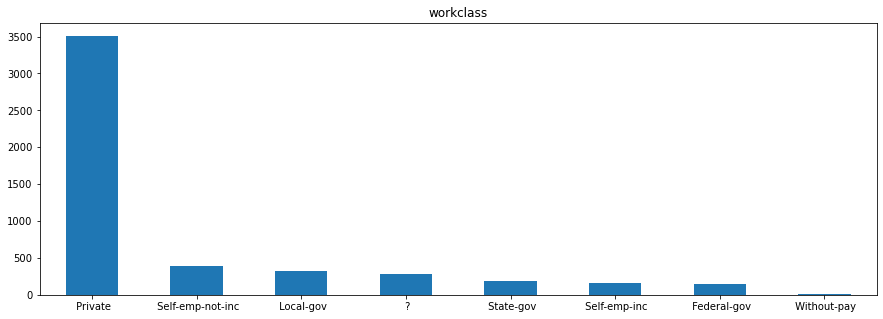

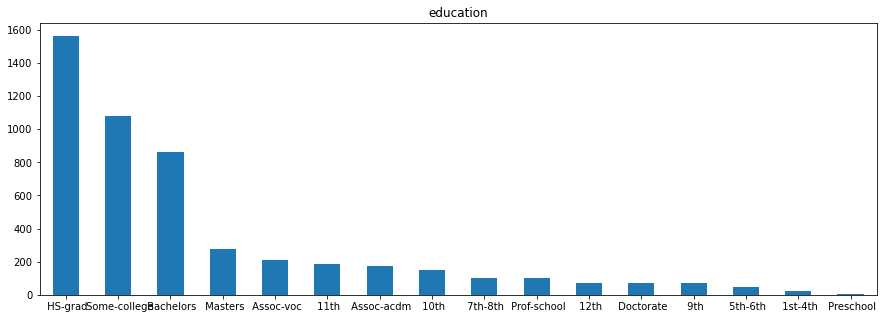

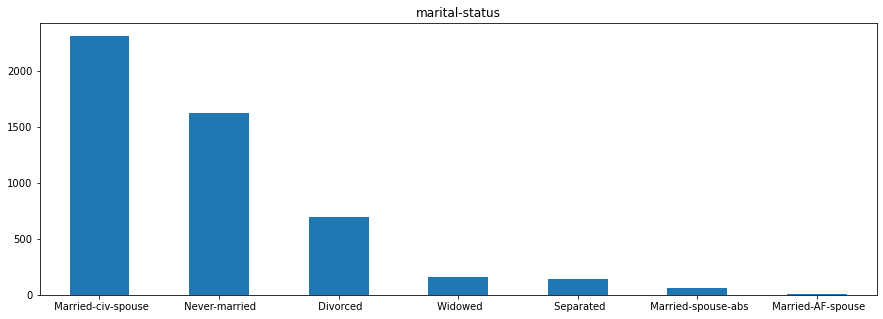

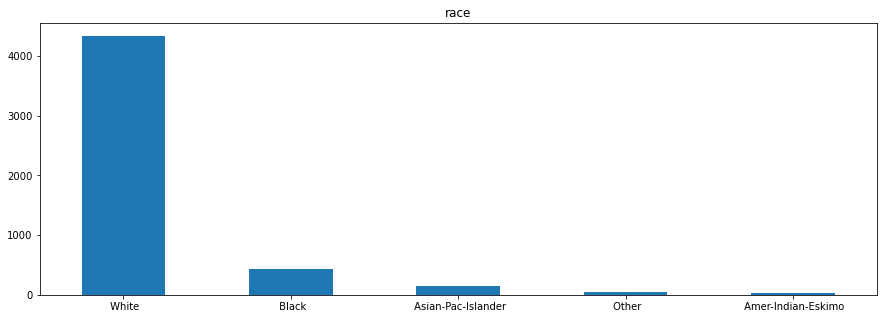

In [244]:
categorical_columns = ['workclass', 'education', 'marital-status', 'race']
for column in categorical_columns:
    original_df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(15,5), rot=0)
    plt.show()

In [245]:
# Data to plot
def missingValDetails(data):
    labels = []
    sizes = []

    for x, y in data.items():
        labels.append(x)
        sizes.append(y)
        print('{0} %: {1}'.format(x,(y/5000)*100))
    
    plt.pie(sizes, labels=labels)   
    plt.axis('equal')
    plt.show()

In [246]:
# checking the number of citizens with missing native-country values
missing_country_data = {'native country present' : (len(categorized_df[categorized_df['native-country'] == ' ?'])), 
                       'native country missing' : (len(categorized_df[categorized_df['native-country'] != ' ?']))}

missing_country_data

{'native country present': 94, 'native country missing': 4906}

In [247]:
# checking the number of citizens with missing occupation values
missing_occupation_data = {'occupation present' : (len(categorized_df[categorized_df['occupation'] == ' ?'])), 
                       'occupation missing' : (len(categorized_df[categorized_df['occupation'] != ' ?']))}

missing_occupation_data

{'occupation present': 280, 'occupation missing': 4720}

In [248]:
# checking the number of citizens with missing working class values
missing_workclass_data = {'workclass present' : (len(categorized_df[categorized_df['workclass'] == ' ?'])), 
                       'workclass missing' : (len(categorized_df[categorized_df['workclass'] != ' ?']))}

missing_workclass_data

{'workclass present': 280, 'workclass missing': 4720}

native country present %: 1.8800000000000001
native country missing %: 98.11999999999999


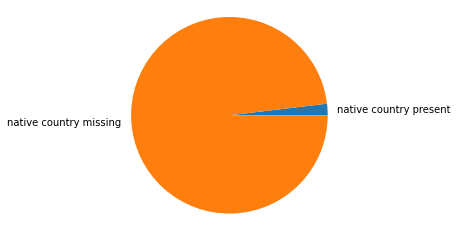

occupation present %: 5.6000000000000005
occupation missing %: 94.39999999999999


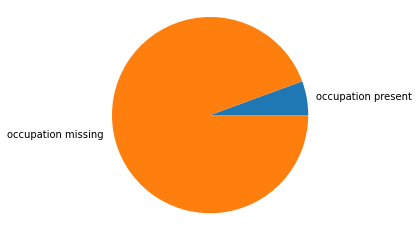

workclass present %: 5.6000000000000005
workclass missing %: 94.39999999999999


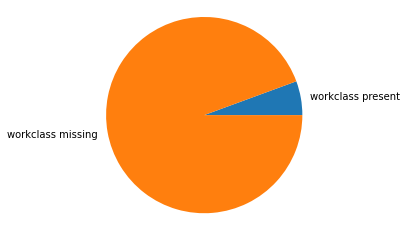

In [249]:
missingValDetails(missing_country_data)
missingValDetails(missing_occupation_data)
missingValDetails(missing_workclass_data)

The <i><b>‘?’</b></i> character is used to depict missing values and occurs in the native country, workclass and occupation categories. An fascinating observation is that there is the exact same number of missing values in the workclass and occupation columns, which could suggest that a missing value in occupation implies a missing value in workclass. Here we will investigate this.

In [250]:
# Checking consistency of ? character in the occupation and workclass columns
missing_occupation_vals = categorized_df[categorized_df['occupation'] == ' ?']
missing_workclass_vals = categorized_df[categorized_df['workclass'] == ' ?']
missing_occupation_vals.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
13,26,?,13,Married-civ-spouse,?,Wife,White,Female,0,0,40,United-States,<=50K
14,71,?,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
29,32,?,10,Never-married,?,Unmarried,White,Female,0,0,40,United-States,<=50K
46,25,?,13,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
52,67,?,9,Widowed,?,Not-in-family,White,Male,1086,0,35,United-States,<=50K


In [251]:
missing_workclass_vals.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
13,26,?,13,Married-civ-spouse,?,Wife,White,Female,0,0,40,United-States,<=50K
14,71,?,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
29,32,?,10,Never-married,?,Unmarried,White,Female,0,0,40,United-States,<=50K
46,25,?,13,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
52,67,?,9,Widowed,?,Not-in-family,White,Male,1086,0,35,United-States,<=50K


In [252]:
missing_occupation_vals.index

Int64Index([  13,   14,   29,   46,   52,   57,   62,   72,   80,   90,
            ...
            4724, 4741, 4743, 4891, 4902, 4930, 4931, 4951, 4959, 4975],
           dtype='int64', length=280)

In [253]:
# Checking if the indexes are the exact same for these two datasets 
# if all indexes are the same then 
comparison = missing_occupation_vals.index == missing_occupation_vals.index
equal_arrays = comparison.all()

print(equal_arrays)

True


As predicted, workclass missing values are consistent with occupation missing values.

In [254]:
missing_native_indexes = list(categorized_df[categorized_df['native-country'] == ' ?'].index)
other_missing_indexes = list(missing_occupation_vals.index)
len(missing_native_indexes)

94

In [255]:
# counting the inconsistencies between the missing native indexes and the occupation/workclass missing indexes
difference_in_indexes = 0
for native_index in missing_native_indexes:
    if native_index not in other_missing_indexes:
        difference_in_indexes += 1

difference_in_indexes

89

It appears that there is very little correlation between the missing native country values and the occupation/workclass missing values. Due to the consistency between the missing values in the occupation/workclass columns, as well as the relativley small number of missing "native-country" values, I'm going to delete these rows.

In [256]:
# Deleting rows containing missing values
#combining missing_native_indexes and other_missing_indexes without duplication
missing_indexes = (other_missing_indexes + list(set(missing_native_indexes) - set(other_missing_indexes)))
print(len(missing_indexes))
categorized_df = categorized_df.drop(missing_indexes)
categorized_df.shape

369


(4631, 13)

As we can now see there is no more unknown values in the dataset.

In [257]:
categorized_df[categorized_df['workclass'] == ' ?']

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category


In [258]:
categorized_df[categorized_df['occupation'] == ' ?']

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category


In [259]:
categorized_df[categorized_df['native-country'] == ' ?']

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category


## Male and Female, 50,000 USD Threshold

1467 : 3164
Percentages: 0.31677823364284174% : 0.6832217663571583%


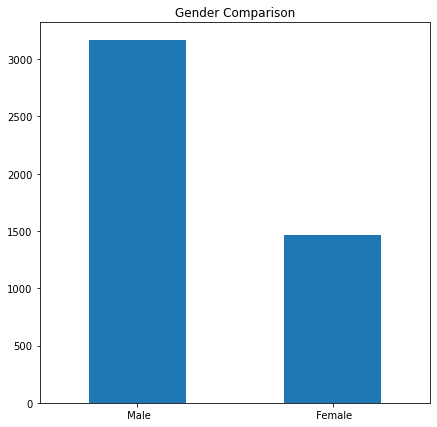

3454 : 1177
Percentages: 0.7458432304038005% : 0.25415676959619954%


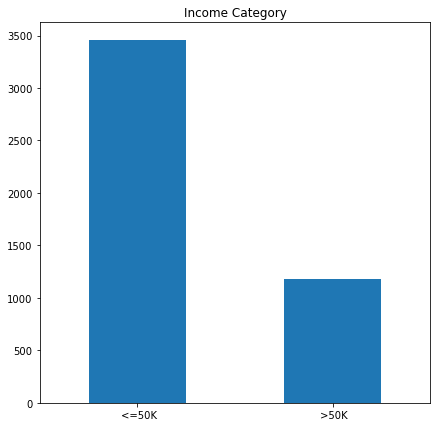

In [260]:
def binaryComparion(column,heading):
    vals = column.value_counts(dropna=False)
    print('{0} : {1}'.format(vals[0], vals[1]))
    val_sum = vals[0] + vals[1]
    print('Percentages: {0}% : {1}%'.format(vals[0]/val_sum, vals[1]/val_sum))
    vals.plot(kind='bar', title='', figsize=(7,7), rot=0)
    plt.title(heading)
    plt.show()
    
binaryComparion(categorized_df['sex'], 'Gender Comparison')
binaryComparion(categorized_df['Income-category'], 'Income Category')

We can see a 75% to 25% imbalance in the labelling column, infavour of <=50k.

In [261]:
age_distribution = categorized_df['age'].value_counts(dropna=False)
age_distribution

23    144
25    143
39    138
32    132
40    131
     ... 
84      1
88      1
77      1
85      1
81      1
Name: age, Length: 70, dtype: int64

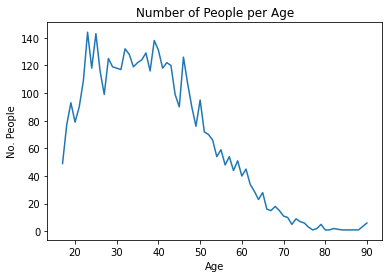

In [262]:
age_distribution = age_distribution.sort_index()

plt.plot(age_distribution)
plt.title('Number of People per Age')
plt.xlabel('Age')
plt.ylabel('No. People')
plt.show()

Most people in this dataset seem to be between 20 and 50 years of age

In [263]:
categorized_df.dtypes

age                   int64
workclass          category
education          category
marital-status     category
occupation         category
relationship       category
race               category
sex                category
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country     category
Income-category    category
dtype: object

In [264]:
categorized_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,27,Private,10,Never-married,Sales,Own-child,White,Male,0,0,35,United-States,<=50K
1,55,Private,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,46,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
3,37,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,46,United-States,<=50K
4,26,Private,10,Married-spouse-abs,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,30,Federal-gov,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4996,34,Private,13,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
4997,24,Private,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
4998,33,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Reset row indexes after dropping rows

In [265]:
categorized_df.reset_index(inplace=True, drop=True)
categorized_df

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income-category
0,27,Private,10,Never-married,Sales,Own-child,White,Male,0,0,35,United-States,<=50K
1,55,Private,9,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,46,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
3,37,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,46,United-States,<=50K
4,26,Private,10,Married-spouse-abs,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4626,30,Federal-gov,10,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4627,34,Private,13,Never-married,Craft-repair,Unmarried,White,Male,0,0,40,United-States,<=50K
4628,24,Private,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
4629,33,Private,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [266]:
categorized_df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,4631.000000,4631.000000,4631.000000,4631.000000
mean,38.434679,950.045778,87.977327,40.751458
std,13.200972,6346.634970,400.500609,11.803438
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,3683.000000,99.000000


### Summary of the issues in data and potential handling strategies

## Normalisation
To evaluate our dataset, we will have to normalize the numerical data and encode the categorical data.

In [267]:
# splitting data by type
categorical_columns = categorized_df.select_dtypes(['category']).columns 
integer_columns = categorized_df.select_dtypes(['int64']).columns 
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Income-category'],
      dtype='object')

Encoding the target

In [268]:
target = categorized_df.pop('Income-category')
target.head(8)

0     <=50K
1     <=50K
2      >50K
3     <=50K
4     <=50K
5      >50K
6     <=50K
7     <=50K
Name: Income-category, dtype: category
Categories (2, object): [<=50K, >50K]

In [269]:
from graphviz import Source # required for printing decision trees in graphic format
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# model utils
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector as selector

In [270]:
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target) # returns array-like of shape target.shape[0]
target_encoded[:8]

array([0, 0, 1, 0, 0, 1, 0, 0])

To normalise the numerical data we are going to use <b><i>MinMaxScaler</i></b> to make sure each numeric column is within a common scale, without deviaiting from the actual ranges of the original data and the normaisled data.

In [271]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_transformed = categorized_df
numeric_transformed[integer_columns] = scaler.fit_transform(categorized_df[integer_columns])
numeric_transformed.head(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.136986,Private,10,Never-married,Sales,Own-child,White,Male,0.000000,0.0,0.346939,United-States
1,0.520548,Private,9,Divorced,Craft-repair,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
2,0.397260,Private,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.500000,United-States
3,0.273973,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.459184,United-States
4,0.123288,Private,10,Married-spouse-abs,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States
5,0.273973,Local-gov,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0.076881,0.0,0.346939,United-States
6,0.342466,Local-gov,9,Widowed,Transport-moving,Unmarried,White,Female,0.000000,0.0,0.397959,United-States
7,0.356164,Self-emp-inc,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0.000000,0.0,0.551020,United-States
8,0.315068,Private,15,Never-married,Exec-managerial,Not-in-family,White,Female,0.000000,0.0,0.397959,Cuba
9,0.219178,Self-emp-not-inc,13,Married-civ-spouse,Sales,Husband,White,Male,0.072981,0.0,0.806122,United-States


In [272]:
numeric_transformed.shape

(4631, 12)

In machine learning the <b><i>One-hot-encoder</i></b> encoding method is ideal for transforming categorical data.

Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=103)


,age,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.136986,0.000000,0.0,0.346939,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.520548,0.000000,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.397260,0.000000,0.0,0.500000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.273973,0.000000,0.0,0.459184,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.123288,0.000000,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0.273973,0.076881,0.0,0.346939,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.342466,0.000000,0.0,0.397959,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0.356164,0.000000,0.0,0.551020,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8,0.315068,0.000000,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0.219178,0.072981,0.0,0.806122,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [274]:
#dropping feature names for missing values
empty_cols = ['workclass_ ?','occupation_ ?', 'native-country_ ?' ]

features_df1 = features.drop([empty_cols[0]], 1)
features_df2 = features_df1.drop([empty_cols[1]], 1)
features_df = features_df2.drop([empty_cols[2]], 1)

In [275]:
print(features_df.shape)
features_df.head()

(4631, 100)


,age,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.136986,0.0,0.0,0.346939,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.520548,0.0,0.0,0.397959,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.397260,0.0,0.0,0.500000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.273973,0.0,0.0,0.459184,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.123288,0.0,0.0,0.397959,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Evaluation Measures


The evaluation measures I have chosen for this <b><i>Imbalanced</i></b> dataset are:
* <b><i>Balanced Accuracy Rate:</i></b> The distribution of class sizes here is skewed towards earning 50k or less a year, with around 75% of the dataset falling within this classification (The majority class) and 25% making up the minority class. This formula measures the proportionate mean of correctly identified positives and negatives.
* <b><i>K-fold Cross Validation:</i></b> As the data set is imbalanced here, there could be bias in the way the data is split. Cross validation is used to ensure model performance is not optimally biased.
* <b><i>ROC Curve:</i></b> (or Reciever Operating Characteristic) is a graphical plot of how the true positive rate and false positive rate change over many different thresholds. This will be used for graphically representing the diagnostic accuracy of a test.
* <b><i>F-measure:</i></b>  A single measure that trades off precision against recall, for a given level of balance.This formula takes into account precision and recall, which is used to measure how accurately the minority class can be predicted.   

## 1(b) Classifier Evaluation
<b><i>Evaluate the performance of three basic classifiers on your dataset: a decision
tree with depth at most 3, a neural network with at most 10 hidden nodes and
1-NN. You can do basic parameter tuning, but there is no need to go overboard.
The goal in this step is simply to create better than random classifiers. [5 marks]</i></b>

Now that are data has been cleaned, encoded, labelled and normalised, we cn split the data for testing and training, before using in models. 
### Train Test Split

In [276]:
# Splitting the data set into 80% for training and 20% for testing
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(features_df, target_encoded, random_state=42, test_size=0.2)

print('Size of training set : ', X_train.shape[0])
print('Size of testing set : ', X_test.shape[0])
print('Size of training target : ', y_train.shape[0])
print('Size of testing target : ', y_test.shape[0])

Size of training set :  3704
Size of testing set :  927
Size of training target :  3704
Size of testing target :  927


# Dummy Classifier
The dummy classifier, which always predicts the positive class of simulation success.DummyClassifier is a classifier that makes predictions using simple rules. This classifier is useful as a simple baseline to compare with other (real) classifiers. Do not use it for real problems.

In [277]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(X_train, y_train)
print(f"Accuracy of the dummy classifier: " f"{dummy_classifier.score(X_test, y_test):.3f}")

Accuracy of the dummy classifier: 0.749


In [278]:
y_predicted_dummy = dummy_classifier.predict(X_test)

### Balanced Accuracy

In [279]:
balanced_accuracy_dt_random = balanced_accuracy_score(y_test, y_predicted_dummy)
print(f"Balanced accuracy (Random): {balanced_accuracy_dt_random :.3f}")

Balanced accuracy (Random): 0.500


### K-fold Cross Validation

In [280]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# KFold doesn't shuffle by default. 
# To shuffle before creating the folds, shuffle=True and random_state=integer to produce reproducible results
cv = KFold(n_splits=10, shuffle=False, random_state=None)

In [281]:
results = cross_validate(dummy_classifier, features_df, target_encoded, cv=cv, scoring='balanced_accuracy')
test_score = results["test_score"]
test_score

array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])

In [282]:
print(f"The average balanced accuracy is " f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The average balanced accuracy is 0.500 +/- 0.000


### F-Beta Measure
F beta is a more general version of the F score, represents the weighted harmonic mean of precision and recall. Its values range in ascending order of optimality between [0,1].

In [283]:
fbeta_score(y_test , y_predicted_dummy, average='weighted', beta=0.5)

0.5901455992103226

# Decision Tree
A decision tree with a max depth of 3.

In [284]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3, criterion='entropy')
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [285]:
from sklearn.metrics import balanced_accuracy_score
y_predicted_dt = dtc.predict(X_test)

### Balanced Accuracy

In [286]:
balanced_accuracy_dt = balanced_accuracy_score(y_test, y_predicted_dt)
print(f"Balanced accuracy: {balanced_accuracy_dt:.3f}")

Balanced accuracy: 0.688


### K-fold Cross Validation

In [287]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

# KFold doesn't shuffle by default. 
# To shuffle before creating the folds, shuffle=True and random_state=integer to produce reproducible results
cv = KFold(n_splits=10, shuffle=False, random_state=None)

In [288]:
results = cross_validate(dtc, features_df, target_encoded, cv=cv, scoring='balanced_accuracy')
test_score = results["test_score"]
test_score

array([0.74599427, 0.69346009, 0.6500814 , 0.66904436, 0.66208438,
       0.67768647, 0.67019449, 0.65896501, 0.65162389, 0.67649392])

In [289]:
print(f"The mean balanced accuracy is " f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The mean balanced accuracy is 0.676 +/- 0.027


### ROC Curve

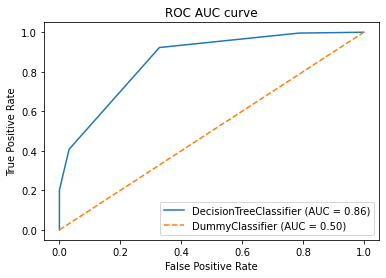

In [290]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(dtc, X_test, y_test)
disp = plot_roc_curve(dummy_classifier, X_test, y_test, color="tab:orange", linestyle="--", ax=disp.ax_)
disp.ax_.set_title("ROC AUC curve");

### F-Beta Measure

In [291]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test , y_predicted_dt, average='weighted', beta=0.5)

0.8097322667105481

# Neural Network
A neural network with at most 10 hidden nodes

In [292]:
# importing Neural network packages ffor scikit learn
from sklearn.neural_network import MLPClassifier

GridSearch is an exhaustive parameter generator for testing the classifier to find the best parameters to use on our model to optimise it's perfomance. As passing through every single possibility would be near impossible and very expensive computationally and time wise, I have manually selected some parameters to pass through the search, with the goal of finding the best version

In [143]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

param_grid = {
    'hidden_layer_sizes':[10,[3,4,3],[5,5],[2,6,2]],
    'activation': ['logistic'],
    'solver': ['lbfgs','sgd'],
    'alpha': [0,0.0005,0.0001,0.0005,0.001],
    'max_iter' : [1000]}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring=['recall','f1'],refit='f1',verbose=2)
gridSearch.fit(X_train, y_train)
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 40 candidates, totalling 40 fits
[CV] activation=logistic, alpha=0, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=logistic, alpha=0, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs, total=   1.4s
[CV] activation=logistic, alpha=0, hidden_layer_sizes=10, max_iter=1000, solver=sgd 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  activation=logistic, alpha=0, hidden_layer_sizes=10, max_iter=1000, solver=sgd, total=   5.0s
[CV] activation=logistic, alpha=0, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs, total=   2.2s
[CV] activation=logistic, alpha=0, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd, total=   0.6s
[CV] activation=logistic, alpha=0, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs, total=   2.2s
[CV] activation=logistic, alpha=0, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd, total=   0.4s
[CV] activation=logistic, alpha=0, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs, total=   2.8s
[CV] activation=logistic, alpha=0, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd, total=   0.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs, total=   1.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=10, max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=10, max_iter=1000, solver=sgd, total=   5.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs, total=   3.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd, total=   1.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs, total=   3.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd, total=   0.9s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs, total=   3.3s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd, total=   2.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs, total=   2.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=10, max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=10, max_iter=1000, solver=sgd, total=   8.3s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs, total=   3.1s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd, total=   1.0s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs, total=   3.7s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd, total=   0.5s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs, total=   1.6s
[CV] activation=logistic, alpha=0.0001, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0001, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd, total=   1.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs, total=   3.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=10, max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=10, max_iter=1000, solver=sgd, total=   6.2s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs, total=   2.8s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd, total=   0.8s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs, total=   3.7s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd, total=   0.8s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs, total=   3.1s
[CV] activation=logistic, alpha=0.0005, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.0005, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd, total=   1.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=10, max_iter=1000, solver=lbfgs, total=   2.9s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=10, max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=10, max_iter=1000, solver=sgd, total=   6.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=lbfgs, total=   3.2s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=[3, 4, 3], max_iter=1000, solver=sgd, total=   0.9s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=[5, 5], max_iter=1000, solver=lbfgs, total=   2.6s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=[5, 5], max_iter=1000, solver=sgd, total=   0.5s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs 


C:\Users\brian\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=lbfgs, total=   3.0s
[CV] activation=logistic, alpha=0.001, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd 
[CV]  activation=logistic, alpha=0.001, hidden_layer_sizes=[2, 6, 2], max_iter=1000, solver=sgd, total=   0.7s
Score:  0.7232876712328767
Parameters:  {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': [2, 6, 2], 'max_iter': 1000, 'solver': 'lbfgs'}


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.6min finished


<b><u>Best score</u> and  <u>parameters</u> from GridSearch</b>

* Score:  0.7232876712328767
* Parameters:  {'activation': 'logistic', 'alpha': 0.001, 'hidden_layer_sizes': [2, 6, 2], 'max_iter': 1000, 'solver': 'lbfgs'}


Now with these best scoring parameters from the gridsearch test, we can use these parameters to train our neural network model.

In [293]:
nn = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(2, 6, 2), random_state=1, max_iter = 10000)
nn.fit(X_train,y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(2, 6, 2), max_iter=10000,
              random_state=1, solver='lbfgs')

In [294]:
y_predicted_nn = nn.predict(X_test)

### Balanced Accuracy

In [295]:
balanced_accuracy_nn = balanced_accuracy_score(y_test, y_predicted_nn)
print(f"Balanced accuracy: {balanced_accuracy_nn:.3f}")

Balanced accuracy: 0.739


### K-fold Cross Validation

In [296]:
cv = KFold(n_splits=10, shuffle=False, random_state=None)

In [297]:
results = cross_validate(nn, features_df, target_encoded, cv=cv, scoring='balanced_accuracy')
test_score = results["test_score"]
test_score

array([0.80629111, 0.80090345, 0.74763431, 0.73111687, 0.78564547,
       0.75788875, 0.75538458, 0.75918367, 0.74444203, 0.77218643])

In [298]:
print(f"The average balanced accuracy is " f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The average balanced accuracy is 0.766 +/- 0.023


### ROC Curve

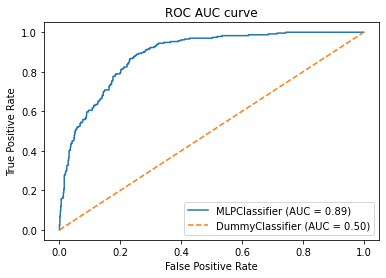

In [299]:
disp = plot_roc_curve(nn, X_test, y_test)
disp = plot_roc_curve(dummy_classifier, X_test, y_test, color="tab:orange", linestyle="--", ax=disp.ax_)
disp.ax_.set_title("ROC AUC curve");

### F-Beta Measure

In [300]:
fbeta_score(y_test , y_predicted_nn, average='weighted', beta=0.5)

0.8178145619491406

# 1 - Nearest Neighbour

In [301]:
from sklearn.neighbors import KNeighborsClassifier
nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [302]:
y_predicted_nbrs = nbrs.predict(X_test)

### Balanced Accuracy

In [330]:
balanced_accuracy_nbrs = balanced_accuracy_score(y_test, y_predicted_nbrs)
print(f"Balanced accuracy: {balanced_accuracy_nbrs:.3f}")

Balanced accuracy: 0.705


### K-fold Cross Validation

In [304]:
cv = KFold(n_splits=10, shuffle=False, random_state=None)

In [305]:
results = cross_validate(nbrs, features_df, target_encoded, cv=cv, scoring='balanced_accuracy')
test_score = results["test_score"]
test_score

array([0.74407874, 0.77311219, 0.65436762, 0.71158638, 0.73832815,
       0.67378003, 0.72747528, 0.68544704, 0.74171137, 0.69428152])

In [306]:
print(f"The average balanced accuracy is " f"{test_score.mean():.3f} +/- {test_score.std():.3f}")

The average balanced accuracy is 0.714 +/- 0.035


### ROC Curve

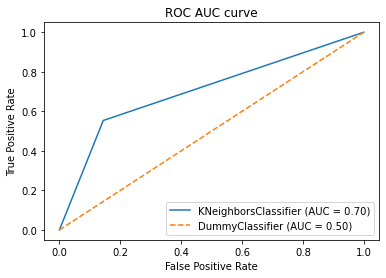

In [307]:
disp = plot_roc_curve(nbrs, X_test, y_test)
disp = plot_roc_curve(dummy_classifier, X_test, y_test, color="tab:orange", linestyle="--", ax=disp.ax_)
disp.ax_.set_title("ROC AUC curve");

### F-Beta Measure

In [308]:
fbeta_score(y_test , y_predicted_nbrs, average='weighted', beta=0.5)

0.7789320504212112

In [332]:
evaluation_table = {'Classifier' : ['Decision Tree', 'Neural Network', '1-NN'],
                    'Balanced Accuracy' : [0.688, 0.739, 0.705],
                    'K-fold Cross Validation' : [0.676, 0.766, 0.714],
                    'AUC' : [0.86,0.89,0.7],
                    'F-Beta score' : [0.810, 0.818, 0.779]
                   }
pd.DataFrame.from_dict(evaluation_table)

,Classifier,Balanced Accuracy,K-fold Cross Validation,AUC,F-Beta score
0,Decision Tree,0.688,0.676,0.86,0.810
1,Neural Network,0.739,0.766,0.89,0.818
2,1-NN,0.705,0.714,0.70,0.779


The neural network appears to be the best preforming network overall, with higher scores in every category. Despite having the poorest balanced accuracy and k fold cross validation, the decision tree has a better F-beta score and Area Under Curve than 1-NN, which suggests that it handles false positives and and the minority class (the over 50k a year in the training set) better than the 1 nearest neighbour model. The neural network has a noticabley high area under curve, implying that it's an accurate model, which may be a result of the gridsearch identification of parameters for the neural network. precision and recall is quite high across all models also.

## 1(c) Bagging
<b><i>Apply ensembles with bagging using the three classifiers from Task (b).
Investigate the performance of these classifiers as the ensemble size increases
(e.g., in steps of 2 from 2 to 20 members). Using the best performing ensemble
size, investigate how changing the number of instances in the bootstrap samples
affects classification performance.  [10 marks]</i></b>

Bagging the decision tree. Bagging randomly sample from training data with 
replacement, apply a classifier to each sample. It encourages diversity in the ensemble, works better for “unstable” 
classifiers - e.g. decision trees, neural networks.

In [315]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [316]:
folds = 5
v = 0
scores_dtc = cross_val_score(dtc, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
scores_nn = cross_val_score(nn, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
scores_nbrs = cross_val_score(nbrs, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')

In [317]:
for i in range(2,22,2):
    tree_bag = BaggingClassifier(dtc, 
                                n_estimators = i,
                                max_samples = 1.0, # bootstrap resampling 
                                bootstrap = True, random_state=1)
    nn_bag = BaggingClassifier(nn, 
                            n_estimators = i,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True, random_state=1)
    
    nbrs_bag = BaggingClassifier(nbrs, 
                            n_estimators = i,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True, random_state=1)
    
    scores_dtc_bag = cross_val_score(tree_bag, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
    scores_nn_bag = cross_val_score(nn_bag, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
    scores_nbrs_bag = cross_val_score(nbrs_bag, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
   
    print('\n\n__________________ ',i)
    print("Mean accuracy for tree_bag {:.2f}".format(scores_dtc_bag.mean()))
    print("Mean accuracy for nn_bag {:.2f}".format(scores_nn_bag.mean()))
    print("Mean accuracy for nbrs_bag {:.2f}".format(scores_nbrs_bag.mean()))
    
    
    



__________________  2
Mean accuracy for tree_bag 0.69
Mean accuracy for nn_bag 0.77
Mean accuracy for nbrs_bag 0.68


__________________  4
Mean accuracy for tree_bag 0.68
Mean accuracy for nn_bag 0.77
Mean accuracy for nbrs_bag 0.69


__________________  6
Mean accuracy for tree_bag 0.66
Mean accuracy for nn_bag 0.77
Mean accuracy for nbrs_bag 0.70


__________________  8
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.77
Mean accuracy for nbrs_bag 0.70


__________________  10
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.76
Mean accuracy for nbrs_bag 0.70


__________________  12
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.76
Mean accuracy for nbrs_bag 0.71


__________________  14
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.76
Mean accuracy for nbrs_bag 0.71


__________________  16
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.75
Mean accuracy for nbrs_bag 0.71


__________________  18
Mean accuracy for tree_bag 

### Investigating bagging with different ensemble sizes

__________________  2
Mean accuracy for tree_bag 0.69
Mean accuracy for nn_bag 0.77
Mean accuracy for nbrs_bag 0.68


__________________  4
Mean accuracy for tree_bag 0.68
Mean accuracy for nn_bag 0.77
Mean accuracy for nbrs_bag 0.69


__________________  6
Mean accuracy for tree_bag 0.66
Mean accuracy for nn_bag 0.77
Mean accuracy for nbrs_bag 0.70


__________________  8
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.77
Mean accuracy for nbrs_bag 0.70


__________________  10
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.76
Mean accuracy for nbrs_bag 0.70


__________________  12
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.76
Mean accuracy for nbrs_bag 0.71


__________________  14
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.76
Mean accuracy for nbrs_bag 0.71


__________________  16
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.75
Mean accuracy for nbrs_bag 0.71


__________________  18
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.74
Mean accuracy for nbrs_bag 0.71


__________________  20
Mean accuracy for tree_bag 0.67
Mean accuracy for nn_bag 0.74
Mean accuracy for nbrs_bag 0.71

As expected with an ensemble size of 2, bagging works best on the decision tree and the neural network. It is interesting to see as the ensemble size grows, the mean accuracy of the decision tree and the neural network fall, whilst it increases for the 1 nearest neighbours classifier. The 1-NN is far more stable than the decision tree and the neural network classifiers which is not very ideal for bagging and may explain its contrary behaviour as ensemble size increases.Because k-NN is a stable classifier, bootstrap resampling does not produce diversity.

In [319]:
print("Mean accuracy for tree {:.2f}".format(scores_dtc.mean()))
print("Mean accuracy for nn {:.2f}".format(scores_nn.mean()))
print("Mean accuracy for nbrs {:.2f}".format(scores_nbrs.mean()))

Mean accuracy for tree 0.66
Mean accuracy for nn 0.76
Mean accuracy for nbrs 0.71


Now we have idenfied the best performing ensemble sizes for each classifier after bagging

In [321]:
# Creating a dictionary of the best preforming ensemble sizes
best_ensemble_sizes = { 'tree_bag' : 2,
                         'nn_bag' : 2,
                          'nbrs_bag' : 20}

Using the best performing ensemble size, investigate how changing the number of instances in the bootstrap samples
effects classification performance

In [323]:
for i in range(1,11,2):
    tree_bag = BaggingClassifier(dtc, 
                                n_estimators = best_ensemble_sizes['tree_bag'],
                                max_samples = i, # bootstrap resampling 
                                bootstrap = True, random_state=1)
    nn_bag = BaggingClassifier(nn, 
                            n_estimators = best_ensemble_sizes['nn_bag'],
                            max_samples = i, # bootstrap resampling 
                            bootstrap = True, random_state=1)
    
    nbrs_bag = BaggingClassifier(nbrs, 
                            n_estimators = best_ensemble_sizes['nbrs_bag'],
                            max_samples = i, # bootstrap resampling 
                            bootstrap = True, random_state=1)
    
    scores_dtc_bag = cross_val_score(tree_bag, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
    scores_nn_bag = cross_val_score(nn_bag, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
    scores_nbrs_bag = cross_val_score(nbrs_bag, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
   
    print('\n\n__________________ ',i)
    print("Mean accuracy for tree_bag {:.2f}".format(scores_dtc_bag.mean()))
    print("Mean accuracy for nn_bag {:.2f}".format(scores_nn_bag.mean()))
    print("Mean accuracy for nbrs_bag {:.2f}".format(scores_nbrs_bag.mean()))



__________________  1
Mean accuracy for tree_bag 0.50
Mean accuracy for nn_bag 0.50
Mean accuracy for nbrs_bag 0.50


__________________  3
Mean accuracy for tree_bag 0.48
Mean accuracy for nn_bag 0.55
Mean accuracy for nbrs_bag 0.53


__________________  5
Mean accuracy for tree_bag 0.63
Mean accuracy for nn_bag 0.71
Mean accuracy for nbrs_bag 0.67


__________________  7
Mean accuracy for tree_bag 0.59
Mean accuracy for nn_bag 0.69
Mean accuracy for nbrs_bag 0.70


__________________  9
Mean accuracy for tree_bag 0.58
Mean accuracy for nn_bag 0.65
Mean accuracy for nbrs_bag 0.67


### Investigating bagging with different number of instances in the bootstrap samples
__________________  1
Mean accuracy for tree_bag 0.50
Mean accuracy for nn_bag 0.50
Mean accuracy for nbrs_bag 0.50


__________________  3
Mean accuracy for tree_bag 0.48
Mean accuracy for nn_bag 0.55
Mean accuracy for nbrs_bag 0.53


__________________  5
Mean accuracy for tree_bag 0.63
Mean accuracy for nn_bag 0.71
Mean accuracy for nbrs_bag 0.67


__________________  7
Mean accuracy for tree_bag 0.59
Mean accuracy for nn_bag 0.69
Mean accuracy for nbrs_bag 0.70


__________________  9
Mean accuracy for tree_bag 0.58
Mean accuracy for nn_bag 0.65
Mean accuracy for nbrs_bag 0.67

In [357]:
instances_in_bootstrap = {'instance_number' : [1,3,5,7,9],
                          'tree_bag' : [0.50, 0.48, 0.63, 0.59, 0.58],
                          'nn_bag' : [0.50, 0.55, 0.71, 0.69, 0.65],
                          'nbrs_bag' : [0.50, 0.53, 0.67, 0.70, 0.67]
                         }

bootstrap_df = pd.DataFrame.from_dict(instances_in_bootstrap)
bootstrap_df = bootstrap_df.set_index('instance_number') 
bootstrap_df

,tree_bag,nn_bag,nbrs_bag
instance_number,,,
1,0.50,0.50,0.50
3,0.48,0.55,0.53
5,0.63,0.71,0.67
7,0.59,0.69,0.70
9,0.58,0.65,0.67


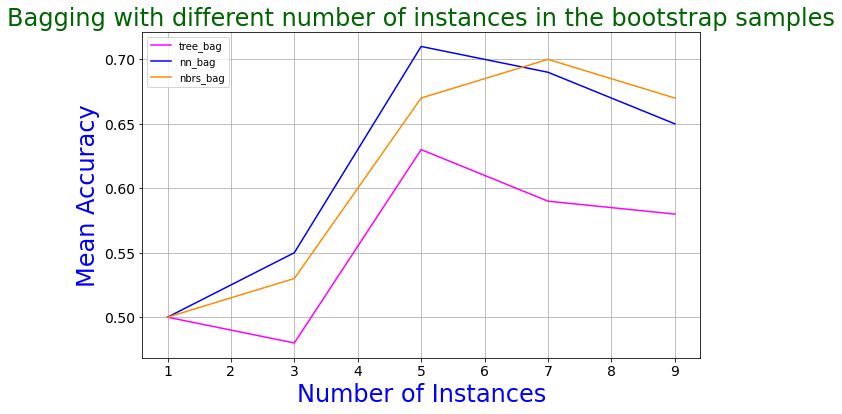

In [356]:
ax = bootstrap_df.plot(figsize=(10,6), fontsize=14, color=["magenta", "blue","darkorange"])
ax.set_title('Bagging with different number of instances in the bootstrap samples',fontsize=24, color="darkgreen")
ax.set_xlabel('Number of Instances', fontsize=24,color="blue")
ax.set_ylabel('Mean Accuracy', fontsize=24,color="blue")
plt.grid()
plt.show()

Although the mean accuracy is greater throughout the graph in the neural network bag than the tree bag, both bagging classifiers react in a similar fashion as the number of instances increas, with both peaking when drawing 5 samples to train the classifier. The 1-nn bagged classifier is also quite similar but hits an apex when 7 samples are drawn with replacement. A fascinating discovery from this graph is that the 1-NN tree out performs the decision tree (with both being optimum ensemble sizes) with every number of instances tested here, despite it's stable vs. unstable nature, and bagging's ensemble diversity functioning better tradtionally with unstable classifiers. 
Once again, our neural network seems the best performing classifier, having the best mean accuracy of optimal ensemble sizes tested, with 5 random instances in the bootstrap samples at 71%.

# 1(d) Random Subspacing
<b><i>Apply ensembles with random subspacing using the three classifiers from Task
(b). Investigate the performance of these classifiers as the ensemble size
increases (e.g., in steps of 2 from 2 to 20 members). Using the best performing
ensemble size, investigate how changing the number of features used when
applying random subspacing affects classification performance.</i></b>

A subset of features is randomly selected without replacement.

In [326]:
# Apply ensembles with random subspacing using the three classifiers from Task
for i in range(2,22,2):
    random_SS_tree = BaggingClassifier(dtc, 
                                n_estimators = i,
                                max_samples=1.0, 
                                max_features=0.5, random_state=10)
    
    random_SS_nn = BaggingClassifier(nn, 
                                n_estimators = i,
                                max_samples=1.0, 
                                max_features=0.5, random_state=10)
    
    random_SS_nbrs = BaggingClassifier(nbrs, 
                                n_estimators = i,
                                max_samples=1.0, 
                                max_features=0.5, random_state=10)
   #Using balanced accuracy to work with the imbalanced data 
    scores_dtc_rss = cross_val_score(random_SS_tree, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
    scores_nn_rss = cross_val_score(random_SS_nn, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
    scores_nbrs_rss = cross_val_score(random_SS_nbrs, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
   
    print('\n\n__________________ ',i)
    print("Mean accuracy for tree RSS {:.2f}".format(scores_dtc_rss.mean()))
    print("Mean accuracy for nn RSS {:.2f}".format(scores_nn_rss.mean()))
    print("Mean accuracy for nbrs RSS {:.2f}".format(scores_nbrs_rss.mean()))
    



__________________  2
Mean accuracy for tree RSS 0.73
Mean accuracy for nn RSS 0.50
Mean accuracy for nbrs RSS 0.65


__________________  4
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.59
Mean accuracy for nbrs RSS 0.68


__________________  6
Mean accuracy for tree RSS 0.66
Mean accuracy for nn RSS 0.58
Mean accuracy for nbrs RSS 0.69


__________________  8
Mean accuracy for tree RSS 0.68
Mean accuracy for nn RSS 0.57
Mean accuracy for nbrs RSS 0.69


__________________  10
Mean accuracy for tree RSS 0.66
Mean accuracy for nn RSS 0.52
Mean accuracy for nbrs RSS 0.71


__________________  12
Mean accuracy for tree RSS 0.66
Mean accuracy for nn RSS 0.52
Mean accuracy for nbrs RSS 0.72


__________________  14
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.53
Mean accuracy for nbrs RSS 0.72


__________________  16
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.58
Mean accuracy for nbrs RSS 0.73


__________________  18
Mean accuracy for tree RSS 

### Investigating random subspacing with different ensemble sizes
__________________  2
Mean accuracy for tree RSS 0.73
Mean accuracy for nn RSS 0.50
Mean accuracy for nbrs RSS 0.65


__________________  4
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.59
Mean accuracy for nbrs RSS 0.68


__________________  6
Mean accuracy for tree RSS 0.66
Mean accuracy for nn RSS 0.58
Mean accuracy for nbrs RSS 0.69


__________________  8
Mean accuracy for tree RSS 0.68
Mean accuracy for nn RSS 0.57
Mean accuracy for nbrs RSS 0.69


__________________  10
Mean accuracy for tree RSS 0.66
Mean accuracy for nn RSS 0.52
Mean accuracy for nbrs RSS 0.71


__________________  12
Mean accuracy for tree RSS 0.66
Mean accuracy for nn RSS 0.52
Mean accuracy for nbrs RSS 0.72


__________________  14
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.53
Mean accuracy for nbrs RSS 0.72


__________________  16
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.58
Mean accuracy for nbrs RSS 0.73


__________________  18
Mean accuracy for tree RSS 0.66
Mean accuracy for nn RSS 0.57
Mean accuracy for nbrs RSS 0.73


__________________  20
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.61
Mean accuracy for nbrs RSS 0.74

Random subspaces encourage diveristy and as expected works well with 1-NN, especially as the number of ensemble sizes grows. The neural network, while less accurate, also improves in sharpness with the increase in the number of ensembles.The more  ensemble members the decision tree encounters, the worse it gets. The decision tree's efficicency could be suffering due to possible strong imbalances occuring in some of the random subspaces.

In [327]:
best_ensemble_sizes['tree_rss'] = 2
best_ensemble_sizes['nn_rss'] = 20
best_ensemble_sizes['nbrs_rss'] = 20
best_ensemble_sizes

{'tree_bag': 2,
 'nn_bag': 2,
 'nbrs_bag': 20,
 'tree_rss': 2,
 'nn_rss': 20,
 'nbrs_rss': 20}

Using the best performing
ensemble size, investigate how changing the number of features used when
applying random subspacing affects classification performance.

In [329]:
for j in range(1,11,2):
    i = j/10 #converting 1 to 0.1 and so on
    random_SS_tree = BaggingClassifier(dtc, 
                                n_estimators = best_ensemble_sizes['tree_rss'],
                                max_samples=1.0, 
                                max_features=i, random_state=10)
    
    random_SS_nn = BaggingClassifier(nn, 
                                n_estimators = best_ensemble_sizes['nn_rss'],
                                max_samples=1.0, 
                                max_features=i, random_state=10)
    
    random_SS_nbrs = BaggingClassifier(nbrs, 
                                n_estimators = best_ensemble_sizes['nbrs_rss'],
                                max_samples=1.0, 
                                max_features=i, random_state=10)
    
    scores_dtc_rss = cross_val_score(random_SS_tree, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
    scores_nn_rss = cross_val_score(random_SS_nn, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
    scores_nbrs_rss = cross_val_score(random_SS_nbrs, features_df, target_encoded, cv=folds, verbose = v, n_jobs = -1, scoring='balanced_accuracy')
   
    print('\n\n__________________ ',i)
    print("Mean accuracy for tree RSS {:.2f}".format(scores_dtc_rss.mean()))
    print("Mean accuracy for nn RSS {:.2f}".format(scores_nn_rss.mean()))
    print("Mean accuracy for nbrs RSS {:.2f}".format(scores_nbrs_rss.mean()))
    



__________________  0.1
Mean accuracy for tree RSS 0.59
Mean accuracy for nn RSS 0.50
Mean accuracy for nbrs RSS 0.55


__________________  0.3
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.64
Mean accuracy for nbrs RSS 0.66


__________________  0.5
Mean accuracy for tree RSS 0.73
Mean accuracy for nn RSS 0.61
Mean accuracy for nbrs RSS 0.74


__________________  0.7
Mean accuracy for tree RSS 0.71
Mean accuracy for nn RSS 0.69
Mean accuracy for nbrs RSS 0.72


__________________  0.9
Mean accuracy for tree RSS 0.70
Mean accuracy for nn RSS 0.74
Mean accuracy for nbrs RSS 0.71


### Investigating how changing the number of features used when applying random subspacing affects classification performance.
__________________  0.1
Mean accuracy for tree RSS 0.59
Mean accuracy for nn RSS 0.50
Mean accuracy for nbrs RSS 0.55


__________________  0.3
Mean accuracy for tree RSS 0.67
Mean accuracy for nn RSS 0.64
Mean accuracy for nbrs RSS 0.66


__________________  0.5
Mean accuracy for tree RSS 0.73
Mean accuracy for nn RSS 0.61
Mean accuracy for nbrs RSS 0.74


__________________  0.7
Mean accuracy for tree RSS 0.71
Mean accuracy for nn RSS 0.69
Mean accuracy for nbrs RSS 0.72


__________________  0.9
Mean accuracy for tree RSS 0.70
Mean accuracy for nn RSS 0.74
Mean accuracy for nbrs RSS 0.71

In [351]:
instances_in_rss = {'instance_number' : [0.1,0.3,0.5,0.7,0.9],
                          'tree_rss' : [0.59, 0.67, 0.73, 0.71, 0.70],
                          'nn_rss' : [0.50, 0.64, 0.61, 0.69, 0.74],
                          'nbrs_rss' : [0.55, 0.66, 0.74, 0.72, 0.71]
                         }

rss_df = pd.DataFrame.from_dict(instances_in_rss)
rss_df = rss_df.set_index('instance_number') 
rss_df

,tree_rss,nn_rss,nbrs_rss
instance_number,,,
0.1,0.59,0.50,0.55
0.3,0.67,0.64,0.66
0.5,0.73,0.61,0.74
0.7,0.71,0.69,0.72
0.9,0.70,0.74,0.71


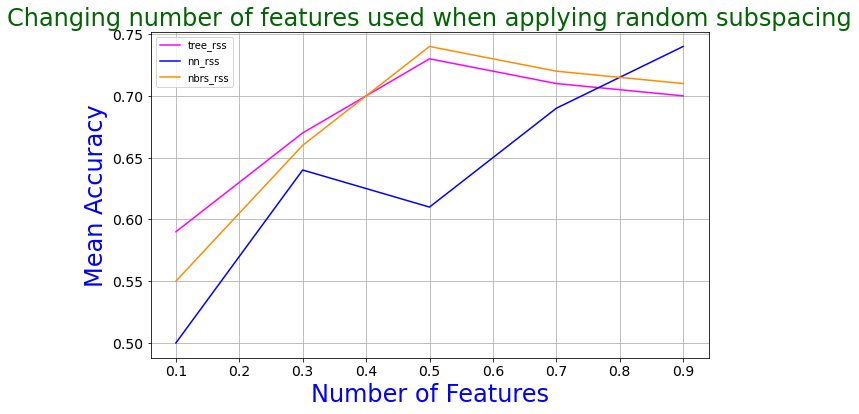

In [355]:
ax = rss_df.plot(figsize=(10,6), fontsize=14, color=["magenta", "blue","darkorange"])
ax.set_title('Changing number of features used when applying random subspacing',fontsize=24, color="darkgreen")
ax.set_xlabel('Number of Features', fontsize=24,color="blue")
ax.set_ylabel('Mean Accuracy', fontsize=24,color="blue")
plt.grid()
plt.show()

A curious insight that we can draw from this graph is that as the number of features increases to 50% of the features set, the 1-nn and decision tree both apex, and behave very similarly throught out the graph, while the neural network noticably. It is at this point that the neural network begins reacting contrary to both the decision tree and the 1-nn classifier. Increased dimensisonality of data often aids nearest neighbour algorithms when relevant features are added. The slight decrease seen beween 50% and 90% could be attributed to noise dimensions affecting accuracy. The decision tree runs a near-same pattern to the 1-NN, which could imply it also gained from access to more complete data, but deteriorated post peak (Curse of dimensionality).It is clear that the neural network operates better with higher-dimensional, with 50% sized subspaces actually decaying the accuracy of a 30% subspace as variance has become harder to distinguish with new data columns confusing the algorithm.

# 1(e) Expectations

Bagging is designed to operate on unstable classifiers. From this information, we would expect the method to work well with both the decision tree and neural network models.

Random subspacing works finer on more stable classifiers. This indicates that the 1-NN is ideal for this approach.
From my work on this dataset, as expected the neural network model implemented here functions better using the bagging ensemble technique and the nearest neighbour method works better using random subspacing too. However, it appears that the decision tree unexpectedly works nicer using random subspacing than bagging. 

We know from our analysis that bagging with increased ensemble size worsens the predictive integrity of this decision tree, which also reacts poorly to a range of different number of instances in the bootstrap samples.

To improve the accuracy of the decision tree we can cut down some of the data being used (pruning) to try obtaining a higher accuracy. Furthermore, increased depth (> 3) will add complexity to the model without overfitting should enable us to implement a more precise predictive decision tree than our current one. Going too deep can result in the decision tree perfectly fitting the training data, meaning the model will not be able to generalize adequately on the test set.


# 1(f) Comparison
Compare the ensemble classifiers with the tuned individual classifiers, e.g.,
decision trees with more depth, k-NN with a carefully chosen k and a neural
network with a carefully chosen number of hidden layers and hidden nodes.

For the purpose of this comparison we will compare the highest scoring ensemble balanced_average (be it bagging or subspacing) against the balanced accuracy of the newly implemented classifier with finer-tuned parameters.

### Decision Tree

In [371]:
#Increasing depth slightly to avoid overfitting
deeper_dtc = DecisionTreeClassifier(max_depth=5, criterion='entropy')
deeper_dtc.fit(X_train, y_train)
y_predicted_dtc_deeper = deeper_dtc.predict(X_test)

In [372]:
balanced_accuracy_dtc_deeper = balanced_accuracy_score(y_test, y_predicted_dtc_deeper)
print(f"Balanced accuracy: {balanced_accuracy_dtc_deeper:.3f}")

Balanced accuracy: 0.761


A decision tree with a 50% random subspace of the data set and an esemble size of 2 is the highest scoring ensemble classifier with 0.73 balanced accuracy

Here it is clear that increasing the maximum depth of a tree slightly, as not to cause without causing overfitting, whilst improving variation diffrentiation abilities of the model.

### K-nn

In [378]:
for i in range(2,10):
    k_nbrs = KNeighborsClassifier(n_neighbors=i)
    k_nbrs.fit(X_train, y_train)
    y_predicted_k_nbrs = k_nbrs.predict(X_test)
    balanced_accuracy_k_nbrs = balanced_accuracy_score(y_test, y_predicted_k_nbrs)
    print('_________{0}'.format(i))
    print(f"Balanced accuracy: {balanced_accuracy_k_nbrs:.3f}")

_________2
Balanced accuracy: 0.652
_________3
Balanced accuracy: 0.730
_________4
Balanced accuracy: 0.681
_________5
Balanced accuracy: 0.728
_________6
Balanced accuracy: 0.697
_________7
Balanced accuracy: 0.726
_________8
Balanced accuracy: 0.716
_________9
Balanced accuracy: 0.728


_________3
Balanced accuracy: 0.730

1-nearest neighbour with 20 ensemble members or/and 5 features in the random subspacing classifier has a mean balanced accuracy rate of 0.74

This comparison is an excellent example of how ensemble classifiers can outperform individual classifiers, with this random subspacing ensemble making slightly more conclusive forecasts.

### Neural Network

In [420]:
hidden_layer_lists = [[64,32,16,8,4,2],[16,8,4,2],[2,2],[3,4,3,4]]

for hidden_layer_list in hidden_layer_lists:
    nn_2 = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(hidden_layer_list), random_state=1, max_iter = 10000)
    nn_2.fit(X_train,y_train)
    y_predicted_nn_2 = nn_2.predict(X_test)
    balanced_accuracy_nn_2 = balanced_accuracy_score(y_test, y_predicted_nn_2)
    print("Using layout: {0}".format(hidden_layer_list))
    print(f"Balanced accuracy: {balanced_accuracy_nn_2:.3f}")

Using layout: [64, 32, 16, 8, 4, 2]
Balanced accuracy: 0.724
Using layout: [16, 8, 4, 2]
Balanced accuracy: 0.716
Using layout: [2, 2]
Balanced accuracy: 0.500
Using layout: [3, 4, 3, 4]
Balanced accuracy: 0.744


A neural network bagged with an ensemble size of 2, has mean balanced accuracy rate of 0.77.

The neural network with the ensemble size of 2 can outperform all of these randomly generated hidden unit and node distributions, again reinforcing the purpose of ensembles.

# 2(a)
There is a 100% chance that Emma is actually positive for Covid-19, as all healthy individuals are identified correctly as healthy by this testing method, so there are no false positives (100% specific).

# 2(b)
* K-nearest neighbour- Is relatively simple to explain to a layman. It is a classification method, where an unknown data point on a 2-D plane, will categorise itself the same as it’s k closest neighbours (in distance), where k is an integer. If there are a points k nearest neighbours span two or more categories, the point will associate with the category that makes up most of the selected neighbours. This can be aided greatly with a visual aid. 

* It is easy for the user to understand why we get a particular answer, and to manipulate the data as to produce a different prediction, especially in smaller data sets.

* The user specifies the weights of different features in the model.

* Decision tree – It’s conditional, flow-chart nature is very easy to explain to a layman, especially with a labelled visual aid.
* Like k-NN, as it is easily interpreted and visualized, adding bias is quite simple if desired. Splitting is done using rules inferred from the training set.

* A decision tree does not traditionally use weights.

* SVM or Support Vector Machine is generally difficult to interpret.

* Although possible, it is far from easy to optimise SVM’s predictions.

* Weights can be easily interpreted in a linear model, but this becomes far more difficult in higher dimensional spaces.

* Random forest- Despite being a multitude of decision trees, which are inherently easy to interpret, but trying top understand the paths of multiple sometimes tens or hundreds of trees is far more difficult.

* It is usually very difficult to modify prediction in a random forest and almost impossible as the number of trees increases.
* Similarly, it is very difficult to identify weights in a random forest.

* Deep neural network-  Even regular artificial neural networks are often referred to as “Black Boxes” i.e. a human cannot look inside the model and easily interpret the outputs. A deep neural network is no exception and is even more complex than regular artificial neural networks.
* Deep neural networks are very difficult to understand, and so altering predictions is an almost impossible feat.
* There is no analytical solution for calculating weights in a deep neural network. Usually the value for weights is estimated from the model’s training set.


# 2(C)

* Divisive clustering is more complex that agglomerative clustering. In each case of divisive clustering, we need to spit each cluster until individual data has been split into a singleton cluster.
* Divisive clustering is more efficient if the overall hierarchy is not completed all the way down to individual data leaves. Naïve agglomerative clustering is much more exhaustive as it has to calculate the shortest distance in each n-1 iteration.
* Divisive clustering is more accurate than agglomerative, as agglomerative does not take into account the global distribution of data, unlike the divisive method, instead opting for local patterns instead, which can lead to errors in latter stages of the strategy.

#### Single linkage
Defines cluster distance as the smallest pairwise distance between items from each cluster.

<b>Advantages of single linkage</b>
* Can accurately differentiate between non elliptical shapes, as long as there is a sufficient gap between two clusters.

<b>Disadvantages of single linkage</b>
* Noise greatly impacts this method’s ability to differentiate and separate from each other.

#### Complete Linkage
Defines cluster distance as the largest pairwise distance between items from each cluster.

<b>Advantages of complete linkage</b>
* Is able to effectively separate clusters regardless of noise.

<b>Disadvantages of complete linkage</b>
* Can result in large clusters being split.
* Can be biased towards disk-shaped clusters.


# 2(D)
Stochastic gradient descent chooses random subset of data set to preform gradient descent. This is less expensive on both memory and time than batch gradient descent, which computes the gradient using the whole dataset. Additionally stochastic gradient descent helps the algorithm escape “bad” local minima better than it’s batch counterpart.

# 2(E)
K-means is very popular due to it’s ability to scale to large data sets, ability to adapt and generalise different cluster shapes and sizes, and ease of application using Lloyd’s algorithm. Although K-means is not perfect, it’s ease of deployment and accuracy is sufficient for it’s use in applications and on large data sets, even with it’s less significant disadvantages such as outlier handling and scaling high-dimensional data.

# 2(F)
Since the clusters are imbalanced in size, Lloyd’s Algorithm is prone to place all of the cluster centres in the majority cluster. As a result, Lloyd’s algorithm will be unable to identify the two minority classes.
K-means++ works to push randomly selected centroids as far from one another as possible, based on the proportional probability to the squared distance. Applying k-means++ to this data set will provide improved cluster centroid selection compared to Lloyd’s algorithm.
